<a href="https://colab.research.google.com/github/SaishWarule1116/LangGraph-Experiments/blob/main/3_LLM_based_SimpleWorkflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install langgraph


In [8]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [9]:
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

Before you can make any API calls, you need to initialize the Generative Model.

In [12]:
# Initialize the Gemini API
gemini_model = genai.GenerativeModel('gemini-1.5-flash')

Now you can make API calls. For example, to generate a poem:

In [13]:
response = gemini_model.generate_content('hey')
print(response.text)

Hey there! How can I help you today?



**Create State**

In [14]:
class LLm_State(TypedDict):
  question: str
  response: str

In [15]:
def llm_qa(state: LLm_State)-> LLm_State:
  # extract Question
  que = state['question']

  #from prompt
  prompt = f"Answer of the following question {que}"

  #ask to llm
  response = gemini_model.generate_content(prompt)
  state['response'] = response.text
  return state

**Create Graph**

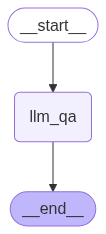

In [16]:
graph = StateGraph(LLm_State) # Object of StateGraph

graph.add_node('llm_qa',llm_qa) # Create Node

graph.add_edge(START,'llm_qa') # Create Edge
graph.add_edge('llm_qa',END) # Create Edge

workflow = graph.compile() # Compile Graph

workflow


In [17]:
initial_state = {'question' : 'What is the capital of France?'}
final_state = workflow.invoke(initial_state)
print(final_state)

{'question': 'What is the capital of France?', 'response': 'Paris\n'}
